In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed DifferentiationInterface ─ v0.7.2
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.2
  [8d63f2c5] + Dispatch

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
def dataframe(non_eccentric, non_spinning, aligned_spin, not_deprecated):
    df = sxs.load("dataframe")
    df = df.loc[np.isfinite(df["common_horizon_time"])]
    if non_eccentric:
        df = df.loc[df['reference_eccentricity'] < 0.01]
    if non_spinning:
        df = df.loc[df["reference_dimensionless_spin1_mag"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_mag"] < 0.001]
    if aligned_spin:
        df = df.loc[df["reference_dimensionless_spin1_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin1_y"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_y"] < 0.001]
    if not_deprecated:
        df = df.loc[df["deprecated"] == False]
        df = df.drop('SXS:BBH:0621') #All of my best models were having a hard time fitting CHT for this simulation. Seems like an outlier
    return df    
    
df = dataframe(non_eccentric = True, non_spinning = False, aligned_spin = True, not_deprecated = True)
print(len(df))

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.
847


,deprecated,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_eccentricity_bound,reference_time,reference_dimensionless_spin1_x,reference_dimensionless_spin1_y,...,initial_position2,number_of_orbits,number_of_orbits_from_start,number_of_orbits_from_reference_time,DOI_versions,keywords,date_link_earliest,date_run_earliest,date_run_latest,date_postprocessing
SXS:BBH:0109,False,5.002185,-0.416321,2.905788e-11,1.222537e-11,0.001107,0.001107,340.0,2.774974e-11,-5.887337e-12,...,"[-10.842053879085812, 0.01778760695721, 0.0]",14.722808,14.722808,13.662139,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]","[Aligned-Spins, ManyMergers-Eccentric]",2013-03-06 21:55:55,2013-03-20 16:14:47,2013-03-26 21:08:03,2025-01-28 02:23:58.831999
SXS:BBH:0111,False,5.002185,-0.416321,3.361803e-11,8.127081e-12,0.005026,0.005026,330.0,3.151207e-11,-4.612294e-12,...,"[-10.84210325077548, 0.0178936483921968, 0.0]",14.492748,14.492748,13.456149,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]","[Aligned-Spins, ManyMergers-Eccentric]",2013-03-06 21:55:55,2013-03-21 17:11:33,2013-03-26 23:55:25,2025-01-28 02:24:18.424542
SXS:BBH:0160,False,1.000000,0.899733,4.319665e-10,6.416923e-10,0.000424,0.000424,617.5,6.190920e-10,-6.695725e-11,...,"[-7.68299999943092, 2.09751803021063e-09, -9.3...",24.830741,24.830741,23.316955,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]","[Aligned-Spins, ManyMergers-SKS]",2012-05-24 05:29:13,2012-05-24 02:39:09,2012-12-28 16:36:23,2025-01-28 02:26:04.841462
SXS:BBH:0172,False,1.000000,0.979404,5.102574e-08,4.968349e-08,0.000773,0.000773,1013.5,5.050346e-08,-4.115912e-09,...,"[-7.6823837292013835, -7.13645022433e-05, 0.0]",25.351979,25.351979,22.836064,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]","[Aligned-Spins, ManyMergers-SKS]",2013-06-13 00:23:55,2013-06-12 17:27:55,2013-07-31 14:49:46,2025-01-28 02:29:02.813437
SXS:BBH:0175,False,1.000000,0.749934,6.049267e-08,6.216751e-08,0.003253,0.003253,806.0,5.727744e-08,-3.028772e-08,...,"[-7.682997542083081, -1.9054576688e-06, 0.0]",23.925478,23.925478,21.941920,"[, v1.1, v1.2, v1.3, v1.4, v1.5, v2.0, v3.0]",[],2014-01-27 20:15:09,2014-01-31 00:43:59,2014-02-08 10:51:57,2025-01-28 03:18:12.932913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SXS:BBH:4429,False,5.000050,-0.749860,1.594904e-02,4.425227e-08,0.000237,0.000237,1619.5,-1.561754e-02,-1.144783e-02,...,"[-12.4730227398358, 0.0327643804713544, -0.000...",19.408482,19.408482,15.088640,"[, v3.0]",[],2019-09-11 23:08:51,2019-10-26 22:45:54,2019-11-18 09:19:18,2025-01-29 23:43:58.847554
SXS:BBH:4430,False,1.499904,0.300088,8.523807e-05,5.867959e-08,0.000351,0.000351,1561.5,2.448392e-05,7.169091e-05,...,"[-9.16648846802083, 0.0141956797971097, 2.6700...",20.998910,20.998910,16.951242,"[, v3.0]",[],2020-01-07 16:07:58,2020-01-11 23:36:14,2020-01-19 05:01:30,2025-01-29 23:43:30.578261
SXS:BBH:4431,False,2.999979,-0.375023,8.830245e-05,1.883918e-07,0.000488,0.000488,1653.0,-6.200648e-05,-7.864973e-05,...,"[-11.406024474353778, 0.0291794654940498, -2.6...",19.411952,19.411952,15.086971,"[, v3.0]",[],2020-01-07 16:07:58,2020-01-11 17:05:23,2020-01-21 23:13:28,2025-01-29 23:43:15.425412
SXS:BBH:4432,False,4.999232,-0.416752,8.661861e-05,1.709526e-07,0.000716,0.000716,1356.0,-7.732143e-05,-5.902607e-05,...,"[-11.579775575584273, 0.0296964902308566, -2.2...",18.326468,18.326468,14.315320,"[, v3.0]",[],2020-01-07 16:07:58,2020-01-12 12:47:32,2020-01-29 00:42:38,2025-01-29 23:43:08.465175


In [5]:
ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]

In [6]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [7]:
init_param = np.column_stack((ref_orb_period, df["reference_mass_ratio"]))

with open("best_model_0.446.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

direct_corrections = loaded_model.predict(init_param)
corrected_CHT = Newtonian_CHT([ref_orb_period, df["reference_mass_ratio"]]) - direct_corrections #Subtracts "post-Newtonian" corrects from the Newtonian predictions for CHT

CHT_residual = corrected_CHT - CHT #Defines whatever residual is left over (mostly due to spin) after post-Newtonian corrections are applied to the Newtonian model

In [8]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)


In [9]:
model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the PN residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

In [13]:
def Looped_Symbolic_Regression(num, fitting_params, fitted_data):
    best_avg_err = 0.95
    for i in range(num):
        model.fit(fitting_params, fitted_data, weights = CHT) 
        pred = model.predict(fitting_params)
        current_avg_error = 100*np.sqrt(np.power((fitted_data - pred)/CHT, 2)).mean()
        
        print("Current Prediction Average Error (%):", current_avg_error)
        print("Best Prediction Average Error (%):", best_avg_err)
        print("Current Model Formula:", model.sympy())
        plt.scatter(df["reference_mass_ratio"], 100*(fitted_data - pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
        plt.xlabel("q")
        plt.ylabel("Error in CHT (%)")
        plt.title("Percent Residuals")

        if current_avg_error < best_avg_err:
            best_avg_err = current_avg_error
            best_model = model
            plt.savefig(f"chi_spin_model_{round(best_avg_err, 3)}.png")
            with open(f'chi_spin_model_{round(best_avg_err, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
                pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
        
        plt.close()

        plt.scatter(ref_orb_period, 100*(fitted_data - pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
        plt.xlabel(r"$\tau$")
        plt.ylabel("Error in CHT (%)")
        plt.title("Percent Residuals")

        if current_avg_error == best_avg_err:
            plt.savefig(f"chi_spin_orb_model_{round(best_avg_err, 3)}.png")
        
        plt.close()
        
    return best_model

fitting_params = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"]))
best_model = Looped_Symbolic_Regression(10, fitting_params, CHT_residual)

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.480e+04
Progress: 542 / 900 total iterations (60.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.72
3           8.302e-07  7.376e-01  y = x₂ * -1637.2
5           5.796e-07  1.797e-01  y = (x₀ * x₂) * -4.1464
7           1.420e-07  7.031e-01  y = x₂ * ((-1.3311 - x₁) * x₀)
8           1.080e-07  2.740e-01  y = x₂ * ((sqrt(x₁) * -2.6489) * x₀)
9           8.098e-08  2.879e-01  y = ((-2.2214 - x₁) * 0.808) * (x₀ * x₂)
13          2.296e-08  3.151e-01  y = ((x₀ * (x₁ + 2.1703)) * (x₂ * (-137.5 - x₀))) * 0.0017...
                                      262
───────────────────────────────────────────────────────────────────────────────────────────────────
═════════════════════════════════════════════════════════════

[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 1.0705650793923764
Best Prediction Average Error (%): 0.95
Current Model Formula: x2*(-0.0025217368)*(x1 + 1.929046)*x0*x0


/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250709_140510_0sbqUf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.39
3           7.056e-07  8.189e-01  y = x₂ * -1376.5
5           5.796e-07  9.842e-02  y = x₂ * (x₀ * -4.146)
7           1.420e-07  7.031e-01  y = x₂ * (x₀ * (-1.3311 - x₁))
8           1.080e-07  2.740e-01  y = (x₂ * sqrt(x₁)) * (x₀ * -2.6489)
9           3.826e-08  1.038e+00  y = (x₂ * (x₁ - -2.9699)) * (93.937 - x₀)
11          3.466e-08  4.934e-02  y = ((98.389 - x₀) - x₁) * (x₂ * (3.0102 + x₁))
13          2.500e-08  1.633e-01  y = (x₁ + 2.27) * (((x₂ * (134.3 - x₀)) - 1.2085) * 1.3576...
                                      )
15          2.475e-08  5.197e-03  y = ((x₂ * ((135.6 - x₀) - x₁)) + -1.2059) * ((x₁ + 2.2628...
                                      ) * 1.3276)
17          2.265e-08  4.424e-02  y = (x₂ * (x₁ + 2.2628)) * ((135.6 - x₀) -

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250709_140525_IllcoK/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.39
3           7.315e-07  8.009e-01  y = x₂ * -1234.6
5           5.796e-07  1.164e-01  y = (x₀ * -4.146) * x₂
7           1.420e-07  7.031e-01  y = x₀ * (x₂ * (-1.3311 - x₁))
8           1.080e-07  2.740e-01  y = sqrt(x₁) * (x₂ * (x₀ * -2.6489))
9           7.448e-08  3.715e-01  y = (x₂ * ((x₁ * -0.73158) - 2.0867)) * x₀
10          3.024e-08  9.014e-01  y = ((-1.9045 - x₁) * square(x₀)) * (x₂ * 0.0025336)
12          2.873e-08  2.561e-02  y = (((x₂ * -0.0025345) * square(x₀)) + -1.9045) * (x₁ - -...
                                      1.9045)
13          2.869e-08  1.506e-03  y = (((square(x₀) * x₂) * -0.0025345) + inv(-0.46734)) * (...
                                      x₁ - -1.9045)
14          2.620e-08  9.083e-02  y = ((square(x₀) * 0.0004819

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250709_140531_85zWia/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.63
3           3.504e-06  1.767e-02  y = x₁ * 41.544
4           3.333e-06  4.996e-02  y = inv(-0.010486) * x₂
5           5.796e-07  1.749e+00  y = (x₀ * x₂) * -4.1459
7           1.420e-07  7.031e-01  y = ((-1.3311 - x₁) * x₀) * x₂
8           1.080e-07  2.740e-01  y = ((x₀ * -2.6489) * x₂) * sqrt(x₁)
9           7.449e-08  3.714e-01  y = (((-2.8335 - x₁) * 0.7338) * x₂) * x₀
11          3.023e-08  4.509e-01  y = x₀ * (((x₂ * (-1.9198 - x₁)) * x₀) * 0.0025265)
13          2.355e-08  1.249e-01  y = ((-2.0142 - x₁) * (0.17861 + (x₀ * 0.0019641))) * (x₀ ...
                                      * x₂)
15          2.210e-08  3.168e-02  y = (x₁ + (((x₀ * 0.0016096) + 0.23454) * x₀)) * (x₂ * (-2...
                                      .3535 - x₁))
17       

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250709_140537_mQrnQR/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.25
3           7.111e-07  8.150e-01  y = x₂ * -1301.5
5           5.796e-07  1.023e-01  y = (x₀ * x₂) * -4.1462
7           1.420e-07  7.031e-01  y = (x₀ * (-1.3311 - x₁)) * x₂
9           4.180e-08  6.116e-01  y = (75.458 - x₀) * (x₂ * (x₁ + 2.5622))
11          3.027e-08  1.614e-01  y = ((x₀ * (x₁ + 1.9549)) * -0.0025138) * (x₂ * x₀)
13          2.870e-08  2.658e-02  y = ((x₂ * (x₀ + x₁)) * (x₀ * -0.0024738)) * (x₁ + 1.9549)
14          2.865e-08  1.923e-03  y = ((((x₀ * x₂) + sqrt(x₁)) * x₀) * (x₁ + 1.8789)) * -0.0...
                                      025587
15          2.622e-08  8.828e-02  y = ((x₀ - (x₁ * -2.9377)) * -0.0022741) * ((x₀ * (x₁ + 2....
                                      2765)) * x₂)
16          2.439e-08  7.261e-02  y = x₂ * (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250709_140543_2veLJa/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.57
3           3.039e-06  8.879e-02  y = x₂ * -168.23
5           5.796e-07  8.285e-01  y = (x₂ * -4.1461) * x₀
7           3.561e-07  2.435e-01  y = ((-0.25275 - x₁) * x₂) * x₀
8           1.080e-07  1.193e+00  y = (sqrt(x₁) * (x₀ * -2.6489)) * x₂
9           7.460e-08  3.699e-01  y = (x₂ * (x₁ + 2.9416)) * (x₀ * -0.72166)
11          3.023e-08  4.516e-01  y = (x₂ * (x₁ + 1.9212)) * ((x₀ * -0.0025258) * x₀)
13          2.856e-08  2.837e-02  y = (x₀ * ((x₀ * x₂) + 3.0582)) * ((x₁ + 1.8856) * -0.0025...
                                      59)
15          2.261e-08  1.168e-01  y = (x₁ + 2.1597) * (-1.4793 - ((x₀ * x₂) * (0.18011 - (x₀...
                                       * -0.0018933))))
17          2.126e-08  3.082e-02  y = (-2.0524 - ((x₁ + (x₀ *

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250709_140549_yYfgbt/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.37
3           7.053e-07  8.191e-01  y = x₂ * -1362
5           5.796e-07  9.815e-02  y = (x₂ * -4.1461) * x₀
7           1.420e-07  7.031e-01  y = x₂ * ((-1.3311 - x₁) * x₀)
9           7.448e-08  3.228e-01  y = ((x₁ + 2.8449) * x₂) * (x₀ * -0.73248)
11          3.027e-08  4.502e-01  y = x₂ * ((x₀ * ((-1.8869 - x₁) * x₀)) * 0.0025446)
13          2.541e-08  8.754e-02  y = (-1.0464 - (x₀ * (0.0024486 * (x₁ + 0.89318)))) * (x₀ ...
                                      * x₂)
15          2.254e-08  5.993e-02  y = (2.1264 + x₁) * (((-0.17743 - (x₀ * 0.0019221)) * (x₂ ...
                                      * x₀)) - 1.2533)
17          2.169e-08  1.914e-02  y = (((x₂ * (-0.17743 - (x₀ * 0.0018555))) * (x₁ + x₀)) - ...
                                      

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250709_140555_28N14a/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.28
3           7.053e-07  8.191e-01  y = x₂ * -1357.3
5           5.796e-07  9.817e-02  y = (x₀ * -4.1461) * x₂
7           1.420e-07  7.031e-01  y = ((-1.3311 - x₁) * x₀) * x₂
8           1.080e-07  2.740e-01  y = x₀ * (sqrt(x₁) * (x₂ * -2.6489))
9           7.460e-08  3.699e-01  y = x₂ * (-0.72261 * (x₀ * (x₁ - -2.9406)))
11          3.024e-08  4.514e-01  y = ((x₁ - -1.9166) * (x₀ * (-0.0025322 * x₂))) * x₀
13          2.352e-08  1.257e-01  y = (x₂ * (x₁ - -2.2965)) * (x₀ * ((x₀ * -0.0016587) - 0.2...
                                      4903))
15          2.258e-08  2.040e-02  y = ((x₁ - -2.407) * (((-0.0016042 * x₀) - 0.2398) * x₂)) ...
                                      * (x₀ + x₁)
17          2.138e-08  2.743e-02  y = (x₂ * ((-2.3278 - x₁) * (

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250709_140602_xjSBbL/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.35
3           7.094e-07  8.162e-01  y = x₂ * -1411.2
5           5.796e-07  1.010e-01  y = x₀ * (x₂ * -4.1461)
7           1.420e-07  7.031e-01  y = x₀ * ((-1.3312 - x₁) * x₂)
8           1.080e-07  2.740e-01  y = (x₀ * -2.6489) * (sqrt(x₁) * x₂)
9           3.818e-08  1.040e+00  y = ((90.772 - x₀) * x₂) * (x₁ + 2.8901)
11          2.663e-08  1.802e-01  y = ((144.99 - x₀) * 1.4428) * (x₂ * (x₁ + 2.2725))
13          2.556e-08  2.041e-02  y = 1.4428 * (((144.99 - x₀) * (x₂ * (x₁ + 2.2725))) - x₁)
15          2.339e-08  4.452e-02  y = ((x₂ * (x₁ + 2.679)) * (141.28 - (x₁ + (x₀ + x₁)))) * ...
                                      1.2534
17          2.313e-08  5.602e-03  y = ((((159.05 - (x₀ + (x₁ * 3.0401))) * x₂) * 1.2599) - 1...
                        

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250709_140608_7oUh5K/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.630e-06  0.000e+00  y = 105.46
3           7.508e-07  7.878e-01  y = x₂ * -1194.5
5           5.796e-07  1.294e-01  y = (x₂ * x₀) * -4.1459
7           1.420e-07  7.031e-01  y = (x₂ * (-1.3311 - x₁)) * x₀
9           7.449e-08  3.227e-01  y = (((x₁ - -2.8736) * x₂) * -0.7293) * x₀
10          3.023e-08  9.018e-01  y = (x₁ + 1.9227) * (square(x₀) * (x₂ * -0.0025251))
12          2.715e-08  5.383e-02  y = (square(x₁ + x₀) * (x₁ - -2.1342)) * (-0.002361 * x₂)
13          2.634e-08  3.009e-02  y = square(x₀) * (((x₁ + (2.2168 - sqrt(x₁))) * -0.0034484...
                                      ) * x₂)
14          2.551e-08  3.221e-02  y = (x₂ + 0.009093) * ((square(x₀ + x₁) * (x₁ - -2.1342)) ...
                                      * -0.0023777)
15          2.483e-08  2.704e-02  y = (((2.3616 - sqrt(x₁)) + x₁) * -0.0032034) * (x₂ * squa

In [12]:
best_model.sympy()

x2*(-0.0025305361)*(x1 - 1*(-1.9076936))*x0**2

Text(0.5, 1.0, 'Percent Residuals')

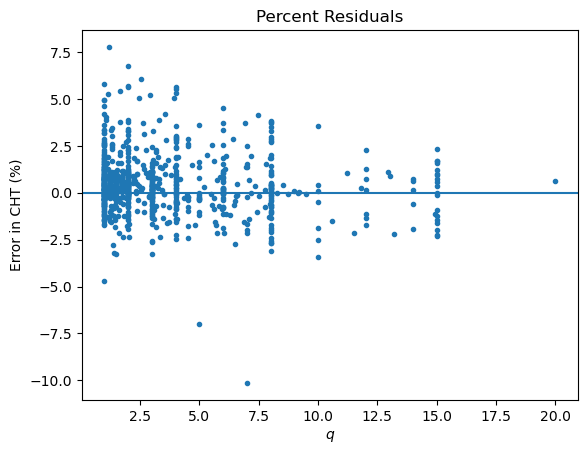

In [10]:

init_param = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_dimensionless_spin1_z"], df["reference_dimensionless_spin2_z"])) #loading data to train on including spin
Residual_pred = loaded_model.predict(init_param) #Uses fitted model to predict residuals between PN model and actual CHT

fig, ax = plt.subplots()
plt.scatter(df["reference_mass_ratio"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.axhline(y=0)
plt.xlabel(r"$q$")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

In [14]:
pip install corner

  Using cached corner-2.2.3-py3-none-any.whl.metadata (2.2 kB)
Using cached corner-2.2.3-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
import corner

In [17]:
with open("chi_spin_model_0.865.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

loaded_model.sympy()

Residual_pred = loaded_model.predict(fitting_params)

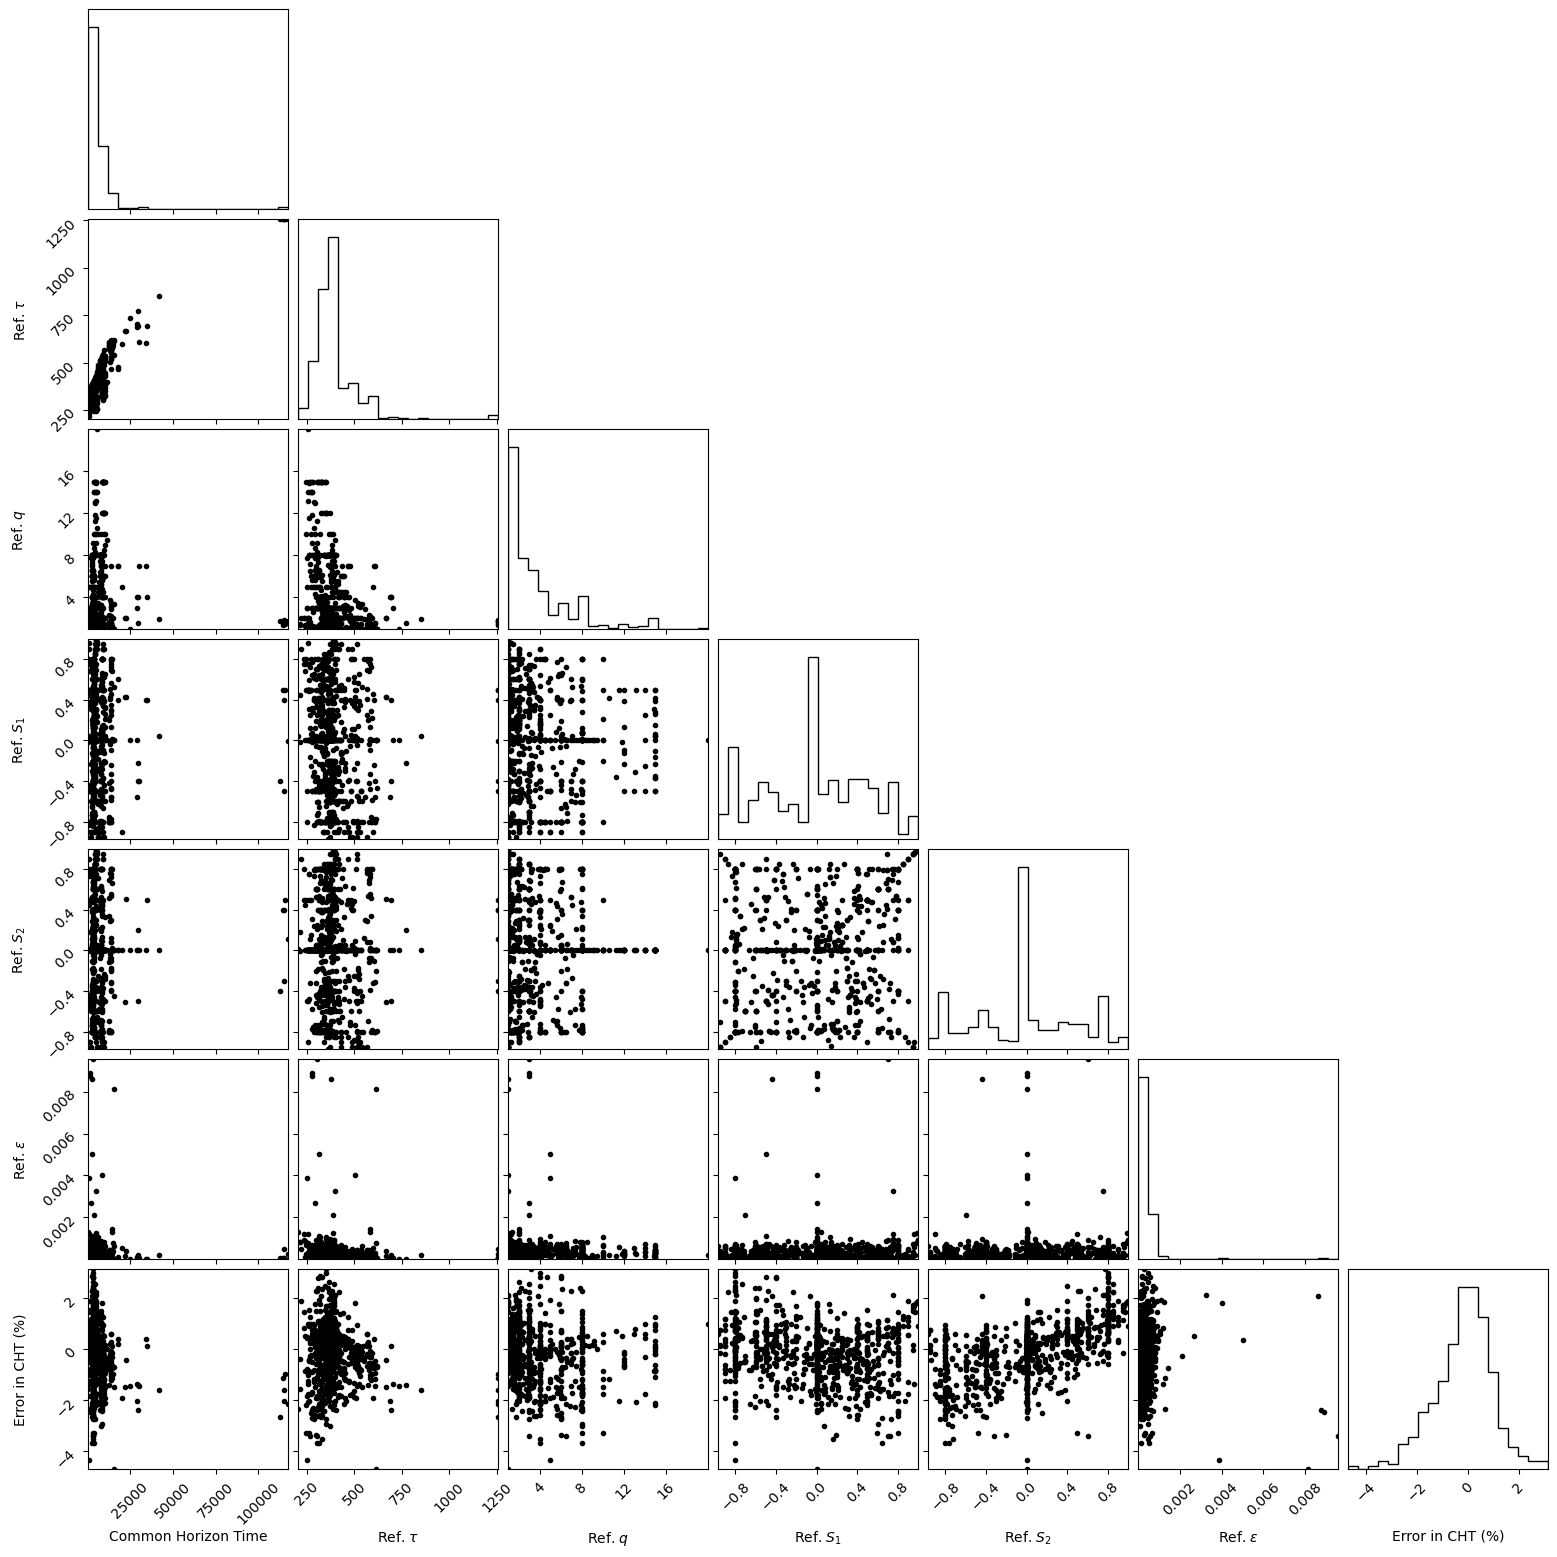

In [18]:
#To make a corner plot, I need to make a ndarray with as many entries as data sets that I want to plot]
num_param = 5
corner_array = np.column_stack([CHT, ref_orb_period, df["reference_mass_ratio"], df["reference_dimensionless_spin1_z"], df["reference_dimensionless_spin2_z"], df["reference_eccentricity"], 100*(CHT_residual - Residual_pred)/CHT])
#Here, we've stacked the columns because we want to plot points with data from the same event, but before we just had each value for all the events stored separately

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Common Horizon Time",
        r"Ref. $\tau$",
        r"Ref. $q$",
        r"Ref. $S_1$",
        r"Ref. $S_2$",
        r"Ref. $\epsilon$",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")

#plt.savefig("Aligned_Spin_Corner.png")